# Automatic Differentiation



In [17]:
import torch

Differentiating the function
$y = 2\mathbf{x}^{\top}\mathbf{x}$
with respect to the column vector $\mathbf{x}$

In [18]:
x = torch.arange(4.0)
x

tensor([0., 1., 2., 3.])

Before we calculate the gradient
of $y$ with respect to $\mathbf{x}$,
we need a place to store it

In [19]:
x.requires_grad_(True)
x.grad

We now calculate our function of `x` and assign the result to `y`

In [20]:
y = 2 * torch.dot(x, x)
y

tensor(28., grad_fn=<MulBackward0>)

We can now take the gradient of `y`
with respect to `x`

In [21]:
y.backward()
x.grad

tensor([ 0.,  4.,  8., 12.])

We already know that the gradient of the function $y = 2\mathbf{x}^{\top}\mathbf{x}$
with respect to $\mathbf{x}$ should be $4\mathbf{x}$

In [22]:
x.grad == 4 * x

tensor([True, True, True, True])

Now let's calculate 
another function of `x`
and take its gradient

In [37]:
##如果不清零，就会继续继求导
x.grad.zero_()
y = x.sum()
y.backward()
x.grad

tensor([1., 1., 1., 1.])

Sum up the gradients
computed individually for each example

In [24]:
x.grad.zero_()
y = x * x
y.backward(gradient=torch.ones(len(y)))
x.grad

tensor([0., 2., 4., 6.])

Move some calculations
outside of the recorded computational graph

In [38]:
x.grad.zero_()
y = x * x
u = y.detach()
z = u * x

z.sum().backward()
x.grad == u

tensor([True, True, True, True])

In [39]:
x.grad.zero_()
y.sum().backward()
x.grad == 2 * x

tensor([True, True, True, True])

Even if
a function required passing through a maze of Python control flow
we can still calculate the gradient of the resulting variable

In [40]:
def f(a):
    b = a * 2
    while b.norm() < 1000:
        b = b * 2
    if b.sum() > 0:
        c = b
    else:
        c = 100 * b
    return c

a = torch.randn(size=(), requires_grad=True)
d = f(a)
d.backward()

a.grad == d / a

tensor(True)

## 练习

In [58]:
def f(a):
    b=a**2+abs(a)
    c=b**3-b**(-4)
    return c
a = torch.randn(size=(3,1), requires_grad=True)
print(a.shape)
print(a)
d = f(a)
d.sum().backward()
print(a.grad)

torch.Size([3, 1])
tensor([[0.0266],
        [1.0398],
        [0.5964]], requires_grad=True)
tensor([[2.7734e+08],
        [4.1848e+01],
        [1.7174e+01]])


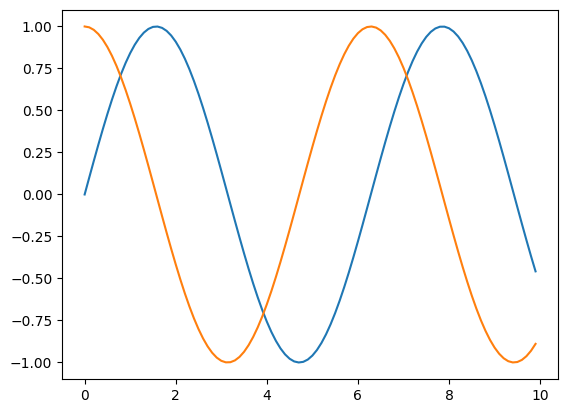

In [13]:
import torch
import matplotlib.pyplot as plt
%matplotlib inline
x = torch.arange(0.0,10.0,0.1)
x.requires_grad_(True)
x1 = x.detach()
y1 = torch.sin(x1)
y2 = torch.sin(x)
y2.sum().backward()
plt.plot(x1,y1)
plt.plot(x1,x.grad)